# Understanding Gaussian Processes with Temperature Prediction

In this notebook, we'll implement a Gaussian Process to predict temperatures throughout the day based on a few measurements. We'll see how GPs handle uncertainty and make predictions.

In [1]:
# Required imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

## 1. Setting up our known temperature measurements
First, let's define our known temperature measurements from different times of the day.

In [2]:
# Convert hours to a 0-1 scale for better GP handling
def hour_to_scaled(hour):
    return hour / 24.0

def scaled_to_hour(scaled):
    return scaled * 24.0

# Known measurements (hour, temperature)
X_train = np.array([[6], [12], [18]])  # Hours
y_train = np.array([15, 25, 20])       # Temperatures

# Scale the hours
X_train_scaled = hour_to_scaled(X_train)

## 2. Creating and fitting the Gaussian Process
We'll use a Radial Basis Function (RBF) kernel, which creates smooth predictions.

In [3]:
# Create and fit the Gaussian Process
kernel = RBF(length_scale=0.1)
gp = GaussianProcessRegressor(kernel=kernel, random_state=42)
gp.fit(X_train_scaled, y_train)

GaussianProcessRegressor(kernel=RBF(length_scale=0.1), random_state=42)

## 3. Making predictions
Now let's predict temperatures for all hours of the day and visualize the results.

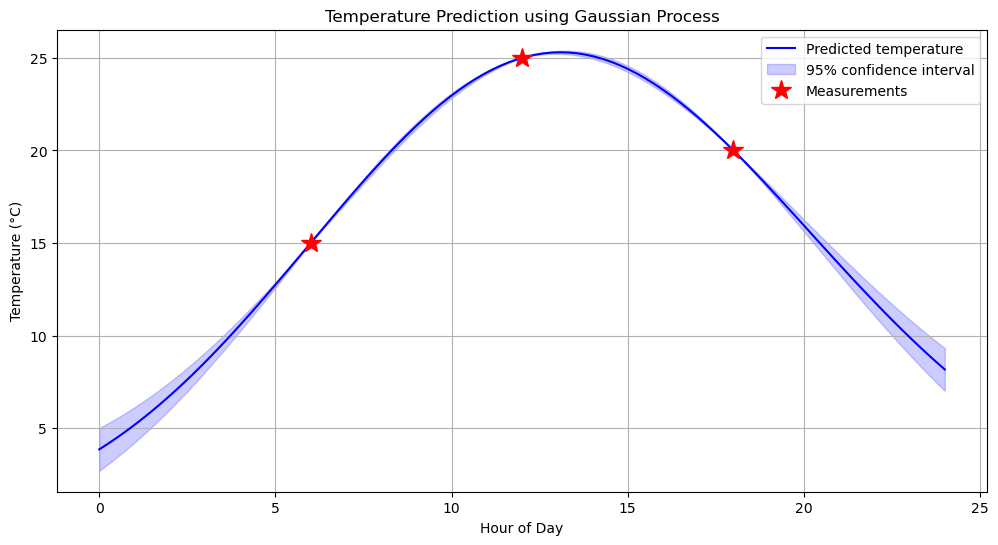

In [4]:
# Create test points for all hours
X_test = np.linspace(0, 24, 100).reshape(-1, 1)
X_test_scaled = hour_to_scaled(X_test)

# Get predictions
y_pred, sigma = gp.predict(X_test_scaled, return_std=True)

# Calculate confidence intervals
confidence_interval = 1.96 * sigma  # 95% confidence interval

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(X_test, y_pred, 'b-', label='Predicted temperature')
plt.fill_between(X_test.ravel(), 
                 y_pred - confidence_interval,
                 y_pred + confidence_interval,
                 alpha=0.2,
                 color='b',
                 label='95% confidence interval')
plt.plot(X_train, y_train, 'r*', markersize=15, label='Measurements')

plt.title('Temperature Prediction using Gaussian Process')
plt.xlabel('Hour of Day')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.legend()
plt.show()

## Understanding the Plot

1. **Red Stars**: These are our actual measurements (6 AM, 12 PM, and 6 PM)
2. **Blue Line**: This is the GP's prediction for temperature at any time
3. **Light Blue Shading**: This shows the uncertainty (95% confidence interval)
   - Notice how it's narrower near our measurements (more confident)
   - And wider between measurements (less confident)

## 4. Let's make some specific predictions
We can use our GP to predict temperatures at specific times with uncertainty.

In [5]:
# Function to predict temperature at a specific hour
def predict_temperature(hour):
    scaled_hour = hour_to_scaled(np.array([[hour]]))
    pred_mean, pred_std = gp.predict(scaled_hour, return_std=True)
    confidence = 1.96 * pred_std  # 95% confidence interval
    
    return pred_mean[0], confidence[0]

# Make some predictions
test_hours = [9, 15, 22]
print("\nPredictions at specific hours:")
for hour in test_hours:
    mean, confidence = predict_temperature(hour)
    print(f"Hour {hour}:00 - {mean:.1f}°C ± {confidence:.1f}°C")


Predictions at specific hours:
Hour 9:00 - 21.3°C ± 0.2°C
Hour 15:00 - 24.4°C ± 0.2°C
Hour 22:00 - 11.8°C ± 0.7°C


c:\Users\esual\miniconda3\envs\venvBjk\lib\site-packages\sklearn\gaussian_process\kernels.py:419: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


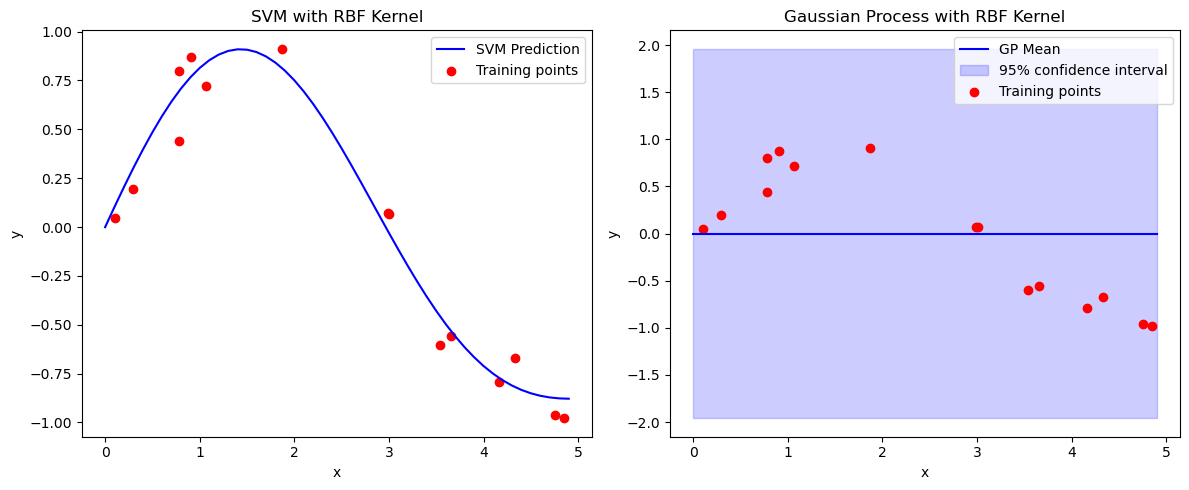


Learned Parameters:
SVM gamma parameter: 0.1
GP length-scale parameter: 9.999999999999997e-06


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Generate sample data
np.random.seed(42)
X = np.sort(5 * np.random.rand(15, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Create test data
X_test = np.arange(0, 5, 0.1).reshape(-1, 1)

# 1. SVM with RBF Kernel
svm = SVR(kernel='rbf', C=100, gamma=0.1)
svm.fit(X, y)
y_svm = svm.predict(X_test)

# 2. Gaussian Process with RBF Kernel
kernel = RBF(length_scale=1.0)
gp = GaussianProcessRegressor(kernel=kernel, random_state=42)
gp.fit(X, y)
y_gp, y_std = gp.predict(X_test, return_std=True)

# Plotting
plt.figure(figsize=(12, 5))

# Plot SVM
plt.subplot(121)
plt.plot(X_test, y_svm, 'b-', label='SVM Prediction')
plt.scatter(X, y, color='red', label='Training points')
plt.title('SVM with RBF Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

# Plot GP
plt.subplot(122)
plt.plot(X_test, y_gp, 'b-', label='GP Mean')
plt.fill_between(X_test.ravel(), 
                 y_gp - 1.96 * y_std,
                 y_gp + 1.96 * y_std,
                 alpha=0.2,
                 color='b',
                 label='95% confidence interval')
plt.scatter(X, y, color='red', label='Training points')
plt.title('Gaussian Process with RBF Kernel')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Print kernel parameters
print("\nLearned Parameters:")
print(f"SVM gamma parameter: {svm.gamma}")
print(f"GP length-scale parameter: {gp.kernel_.length_scale}")